## Exercises on the discrete Fourier transform

:::{exercise} 
:label: fou:ex:parseval

Consider two periodic functions $f(x)$ and $g(x)$ with period $L=2$ and their truncated Fourier series $f_N(x)$ and $g_N(x)$. 
The errors $E_N$ between each function and its trigonometric approximation can be computed using Parseval's identity,
   
\begin{align*}
    E_N = \int_{-1}^{1} f^2(x)\,\mathrm{d}x - 2 \sum_{k=-N}^N |c_k|^2\, .
\end{align*}

a) Let $f(x) = \mathrm{e}^{-x}$ for $x \in [-1,1)$ and consider its periodic extension with period $L=2$. 
   Find on the Fourier coefficients of $f(x)$, calculate the error $E_N$ for $N=2$, $4$ and $8$.

b) Now, do the same for $g(x) = \mathrm{e}^{-|x|}$.

c) Why is the error so much larger when approximating $f(x)$ than in the case of $g(x)$?

:::

:::{solution} fou:ex:parseval

a) 
We first find the Fourier coefficients, 
\begin{align}
    c_k = \int_{-1}^{1} e^{-(1 + i k \pi) x} \, dx =  \frac{2 (-1)^k  \sinh(1)}{1+ik\pi},
\end{align}
and then integrate
\begin{align*}
    \int_{-1}^{1} f^2(x)\mathrm{d}x =  \int_{-1}^{1} e^{-2x} \mathrm{d}x = \frac{e^{2}-e^{-2}}{2} = \sinh(2),
\end{align*}
Then we get an expression for the error, 
\begin{align*}
    E_N = \sinh(2) - 2 \sum_{k=-N}^N  \frac{\sinh^2(1)}{(1+ik\pi)^2} = \sinh(2) - \sum_{k=-N}^N \frac{2\sinh^2(1)}{1+k^2\pi^2}.
\end{align*}
Inserting values for N: $E_2=0.22, E_4=0.123, E_8=0.066$

b) 
Now, we find the Fourier coefficients for $g(x)$
\begin{align*}
    c_k &= \frac{1}{2}\int_{-1}^{1}\mathrm{e}^{-|x|}\mathrm{e}^{-ik\pi x}\, \mathrm{d}x = \frac{1}{1+k^2\pi^2} \left(  1 - \mathrm{e}^{-1}  (-1)^k \right).
\end{align*}

As in a), we need to compute the integral of g(x) squared
\begin{align*}
    \int_{-1}^{1} g^2(x)\mathrm{d}x =  \int_{-1}^{1} e^{-2|x|} \mathrm{d}x = 1-e^{-2},
\end{align*}

\begin{align*}
    E_N = 1-e^{-2}   - 2\sum_{k=-N}^N \left( \frac{1}{1+k^2\pi^2} \left(  1 - \mathrm{e}^{-1}  (-1)^k \right) \right)^2.
\end{align*}

Inserting values for N gives: $E_2=1.19e-3, E_4=2e-4, E_8=2.8e-5$

c) $g(x)$ is smoother than $f(x)$ and the Fourier series for $g(x)$ are therefor a better approximation.

:::

:::{exercise} 
:label: fou:ex:dft-hand

a) Use DFT (by hand) to find the coefficients $c_k$ for the trigonometric polynomial which interpolates the following datapoints 

| t          | 0   | 0.25 | 0.5  | 0.75 |
|------------|-----|------|------|------|
| Datapoint  | 1+i | i    | -1-i | -i   |

b) Plot (using Python) the real and imaginary parts of corresponding interpolation polynomial $Q_k(t) = \frac{1}{n} \sum^{n-1}_{k=0} c_k e^{2\pi i k t} $, together with the datapoints.

:::

:::{solution-start} fou:ex:dft-hand
:::

We have four datapoints,  and recall the definition of $ \omega_N^{-1} = e^{-2\pi i / n} = e^{-i\pi/2} = -i $, use this in the Fourier matrix,

\begin{align}
F_4 = 
\dfrac{1}{4}
\begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & \omega_N^{-1} & \omega_N^{-2} & \omega_N^{-3} \\
1 & \omega_N^{-2} & \omega_N^{-4} & \omega_N^{-6} \\
1 & \omega_N^{-3} & \omega_N^{-6} & \omega_N^{-9} \\
\end{pmatrix}
=
\dfrac{1}{4}
\begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & i & -1 & -i \\
1 & -1 & 1 & -1 \\
1 & -i & -1 & i \\
\end{pmatrix}
\end{align}
We can then multiply the matrix with the vector of datapoints and get the coefficients,
\begin{align}
  c_k = \dfrac{1}{4} F_4 D_4 = \dfrac{1}{4}[0 , 4 + 2i, 0, 2i].
\end{align}

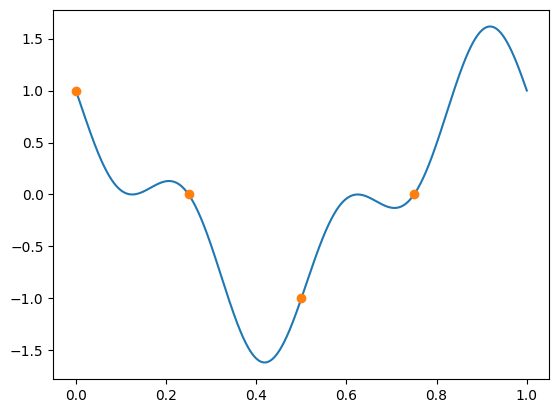

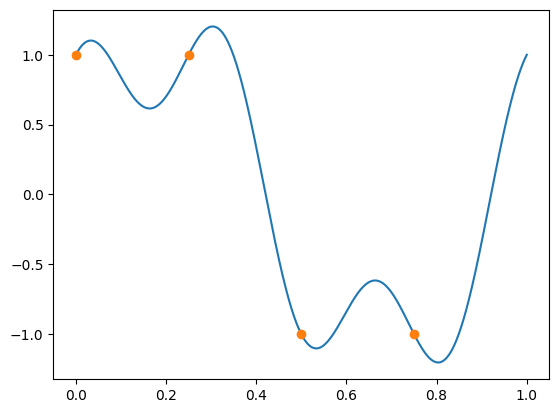

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 4 
datapoints = np.array([1+1j,1j,-1-1j,-1j])
t = np.array([0,0.25,0.5,0.75])
c_k = 1/N*np.array([0,4 + 2j,0,2j]) #found by matrix multiplication as above

x = np.linspace(0,1,10000)

#build the interpolation polynomial
S_N = c_k[0]
for i in range(1,N):
    S_N += c_k[i]*np.exp(2j*np.pi*x*i)
    

plt.plot(x, S_N.real)
plt.plot(t, datapoints.real,marker='o', linestyle='')
plt.show()

plt.plot(x, S_N.imag)
plt.plot(t, datapoints.imag,marker='o', linestyle='')
plt.show()



:::{solution-end}
:::

:::{exercise}
:label: fou:ex:dft-comp

In this task we use the datapoints given in the codeblock below 

a) Interpolate using DFT, this time using numpy/scipy to find the coefficients. Plot the corresponding trigonometric interpolation polynomial $Q_{10}$, and check that it interpolates the datapoints.  

b) Using the Euler formula, and fact that all datapoints are real-valued, we have the following formula to rewrite $Q_{10}$,
\begin{align*}
 P_n(t) = \frac{1}{n} \sum^{n-1}_{k=0} a_k \cos(2\pi i k t) - b_k \sin(2\pi i k t), 
\end{align*}
where $ c_k = a_k + i b_k$.  Plot $P_{10}$ and check that it is the same as $Q_{10}$. 

c) Try plotting 
\begin{align*}
\tilde{P}_{10} = \frac{a_0}{n} + \frac{2}{n} \sum^{n/2-1}_{k=0} (a_k \cos(2\pi i k t) - b_k \sin(2\pi i k t)) + \frac{a_{n/2}}{n}\cos(\pi i t) \end{align*}. 
Explain why $\tilde{P}_{10}$ also interpolates the same datapoints, with only half of the Fourier terms

:::

:::{solution-start} fou:ex:dft-comp
:::

In [2]:
datapoints=np.array([ 1.0, 1.40680225, 1.30007351, 0.73203952, -0.06123174, -0.75, -1.03680225, -0.77007351, -0.00203952, 1.03123174])
t = np.array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

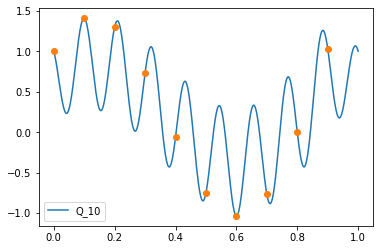

In [3]:
N = 10
x = np.linspace(0,1,10000)  
dft = np.fft.fft(datapoints)

Q_N = dft[0]*1/N
for i in range(1,N):
    Q_N += 1/(N)*dft[i]*np.exp(2j*np.pi*x*i)
    

plt.plot(x, Q_N.real,label="Q_10")
plt.plot(t, datapoints,marker='o', linestyle='')
plt.legend()
plt.show()

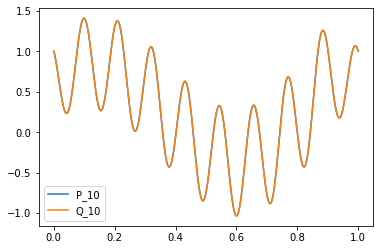

In [4]:
P_N = dft[0].real*1/N#*np.exp(x*1j*0)
for i in range(1,N):
    P_N += 1/(N)*(dft[i].real*np.cos(i*2*np.pi*x) - dft[i].imag*np.sin(i*2*np.pi*x))
    

plt.plot(x, P_N.real, label='P_10')
plt.plot(x, Q_N.real,label="Q_10")
plt.legend()
plt.show()

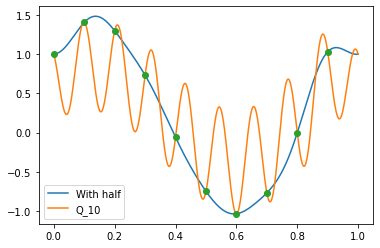

In [5]:
P_N2 = dft[0].real*1/N#*np.exp(x*1j*0)
for i in range(1,int(N/2)):
    P_N2+= 2/(N)*(dft[i].real*np.cos(i*2*np.pi*x) - dft[i].imag*np.sin(i*2*np.pi*x))
P_N2 += 1/(N)*dft[int(N/2)].real*np.cos(N*np.pi*x)

plt.plot(x, P_N2.real, label='With half')
plt.plot(x, Q_N.real,label="Q_10")
plt.plot(t, datapoints,marker='o', linestyle='')
#plt.plot(x, func(x).real)
plt.legend()
plt.show()

If we have real-valued datapoints $x_k$, and do a DFT to get $c_k$, we have that $c_0$ is real valued, and $c_{n-k} = \bar{c}_k$ (you can print out the dft above and check). Using also the trigonometric identities $\cos(2(n-k)\pi t) = \cos(2k\pi t), \sin(2(n-k)\pi t) = -\sin(2k\pi t) $, we will get the formula above (for an even number datapoints, a similar exists of odd number of datapoints). 

:::{solution-end}
:::